# MHY9 patients (6 measurments per patient) and their controls

In [1]:
import os
from pathlib import Path
from glob import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import mannwhitneyu, ttest_ind, f_oneway

In [2]:
Folder = Path(r"D:\Other Backup\Myh9 project")

In [33]:
df_controls = pd.read_excel(Folder / "raw data csv/summary statistics" / "controls_summary_statistics.xlsx")
df_controls["diagnosis"] = "C"
df_controls["patient id"] = "C"

df_patients = pd.read_excel(Folder / "raw data csv/summary statistics" / "patients_summary_statistics.xlsx")
df_patients["diagnosis"] = "p.R424G"
patient_ids = [pat_id.split("_")[1] for pat_id in df_patients["file name"].values]
df_patients["patient id"] = patient_ids

df_all = pd.concat([df_controls, df_patients])

In [8]:
# read metadata

In [9]:
df_controls_meta =  pd.read_excel(Folder / "metadata" / "controls.xlsx")

In [10]:
df_controls_meta.shape

(30, 3)

In [11]:
df_controls_meta["Age"].mean()

35.36666666666667

In [12]:
df_controls_meta["Age"].std()

15.459587658625072

In [13]:
df_controls_meta["Sex"].sum() / df_controls_meta["Sex"].count()

0.6333333333333333

<h3> Print group means and SD </h3>

In [16]:
def print_per_feature(cell_type):
    features = ['Area mean', 'Deformation mean',
            'Inertia ratio mean', 'Porosity mean']
    print(cell_type)
    for feature in features:
        df_all_per_cell_type = df_all[df_all["cell type"] == cell_type].copy()
        print(feature)
        print("Patients")
        print("M=", round(df_all_per_cell_type[df_all_per_cell_type["diagnosis"]=="p.R424G"][feature].mean(),3))
        print("SD=", round(df_all_per_cell_type[df_all_per_cell_type["diagnosis"]=="p.R424G"][feature].std(),3))
        print("Controls")
        print("M=", round(df_all_per_cell_type[df_all_per_cell_type["diagnosis"]=="C"][feature].mean(),3))
        print("SD=", round(df_all_per_cell_type[df_all_per_cell_type["diagnosis"]=="C"][feature].std(),3))

In [17]:
print_per_feature("Erythrocytes")

Erythrocytes
Area mean
Patients
M= 34.315
SD= 0.648
Controls
M= 34.668
SD= 0.742
Deformation mean
Patients
M= 0.332
SD= 0.007
Controls
M= 0.335
SD= 0.008
Inertia ratio mean
Patients
M= 3.757
SD= 0.161
Controls
M= 3.744
SD= 0.128
Porosity mean
Patients
M= 1.087
SD= 0.003
Controls
M= 1.09
SD= 0.006


In [18]:
print_per_feature("Lymphocytes")

Lymphocytes
Area mean
Patients
M= 40.789
SD= 1.626
Controls
M= 40.358
SD= 1.093
Deformation mean
Patients
M= 0.084
SD= 0.004
Controls
M= 0.088
SD= 0.005
Inertia ratio mean
Patients
M= 1.362
SD= 0.033
Controls
M= 1.391
SD= 0.029
Porosity mean
Patients
M= 1.031
SD= 0.002
Controls
M= 1.032
SD= 0.002


In [19]:
print_per_feature("Neutrophils")

Neutrophils
Area mean
Patients
M= 65.966
SD= 1.441
Controls
M= 66.734
SD= 1.908
Deformation mean
Patients
M= 0.125
SD= 0.007
Controls
M= 0.128
SD= 0.01
Inertia ratio mean
Patients
M= 1.708
SD= 0.03
Controls
M= 1.746
SD= 0.047
Porosity mean
Patients
M= 1.036
SD= 0.003
Controls
M= 1.036
SD= 0.005


<h2> Patient cell features compared to controls </h2>

<h3> Plot results </h3>

In [34]:
def plot_results(cell_type, df_all, x_axis):
    fig, ax = plt.subplots(1,4, figsize = (14, 3.5))
    plt.suptitle(cell_type)
    df_all_per_cell_type = df_all[df_all["cell type"] == cell_type].copy()
    sns.boxenplot(data=df_all_per_cell_type,
                    y='Area mean',
                    x=x_axis,
                    hue="diagnosis",
                    palette="pastel",
                    ax=ax[0])
    sns.swarmplot(data=df_all_per_cell_type,
                  y='Area mean',
                  x=x_axis,
                  ax=ax[0],
                  legend=False,
                  s=4,
                  hue="patient id",
                  edgecolor="k",
                  linewidth=0.3)
    sns.boxenplot(data=df_all_per_cell_type,
                    y='Deformation mean',
                    x=x_axis,
                    hue="diagnosis",
                    palette="pastel",
                    ax=ax[1])
    sns.swarmplot(data=df_all_per_cell_type,
                  y='Deformation mean',
                  x=x_axis,
                  ax=ax[1],
                  legend=False,
                  s=4,
                  hue="patient id",
                  edgecolor="k",
                  linewidth=0.3)
    sns.boxenplot(data=df_all_per_cell_type,
                    y='Inertia ratio mean',
                    x=x_axis,
                    hue="diagnosis",
                    palette="pastel",
                    ax=ax[2])
    sns.swarmplot(data=df_all_per_cell_type,
                  y='Inertia ratio mean',
                  x=x_axis,
                  ax=ax[2],
                  legend=False,
                  s=4,
                  hue="patient id",
                  edgecolor="k",
                  linewidth=0.3)
    sns.boxenplot(data=df_all_per_cell_type,
                    y='Porosity mean',
                    x=x_axis,
                    hue="diagnosis",
                    palette="pastel",
                    ax=ax[3])
    sns.swarmplot(data=df_all_per_cell_type,
                  y='Porosity mean',
                  x=x_axis,
                  ax=ax[3],
                  legend=False,
                  s=4,
                  hue="patient id",
                  edgecolor="k",
                  linewidth=0.3)
    ax[0].tick_params(axis='x', labelsize=20)
    ax[0].tick_params(axis='y', labelsize=15)
    ax[0].set_xlabel('')
    ax[0].set_ylabel('Mean area [µm²]', fontsize=20)
    ax[1].tick_params(axis='x', labelsize=20)
    ax[1].tick_params(axis='y', labelsize=15)
    ax[1].set_xlabel('')
    ax[1].set_ylabel('Mean defromation', fontsize=20)
    ax[2].tick_params(axis='x', labelsize=20)
    ax[2].tick_params(axis='y', labelsize=15)
    ax[2].set_xlabel('')
    ax[2].set_ylabel('Inertia ratio', fontsize=20)
    ax[3].tick_params(axis='x', labelsize=20)
    ax[3].tick_params(axis='y', labelsize=15)
    ax[3].set_xlabel('')
    ax[3].set_ylabel('Porosity', fontsize=20)
    
    #sns.move_legend(ax[3], "upper right", bbox_to_anchor=(2.5, 1));
    plt.tight_layout()

    folder = Path(r"D:\Other Backup\Myh9 project\figures")
    fname1 = "Main_results_" + cell_type + ".eps"
    fname2 = "Main_results_" + cell_type + ".png"
    plt.savefig(folder / fname1,
                dpi=350,
                bbox_inches='tight')
    plt.savefig(folder / fname2,
                dpi=350,
                bbox_inches='tight')

Erythrocytes
Lymphocytes
Neutrophils


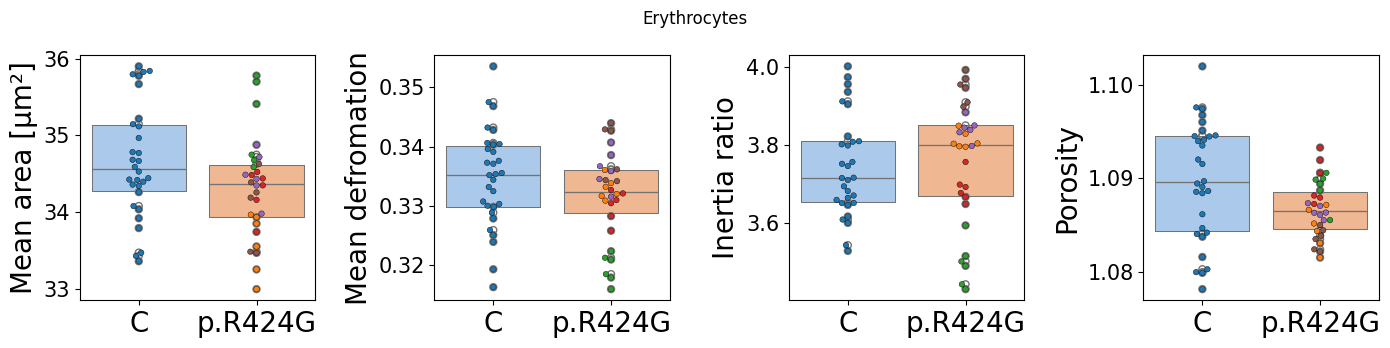

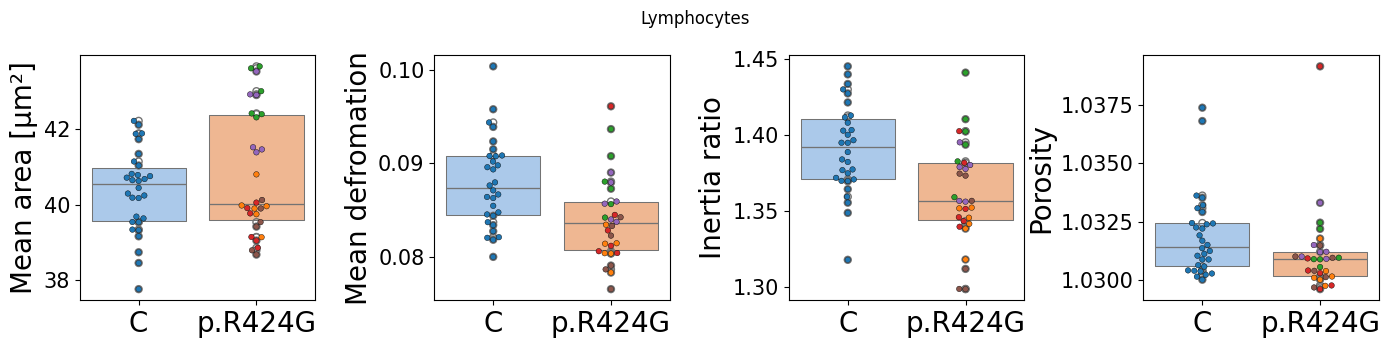

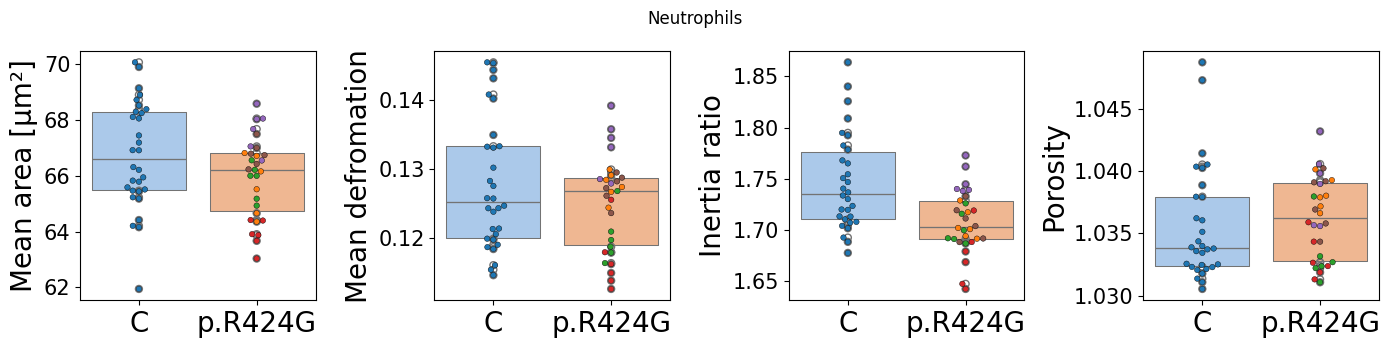

In [35]:
all_cells = ["Erythrocytes", "Lymphocytes", "Neutrophils"]
for cell_type in all_cells:
    print(cell_type)
    plot_results(cell_type, df_all, "diagnosis")

low porosity Lymphocytes
low porosity Neutrophils


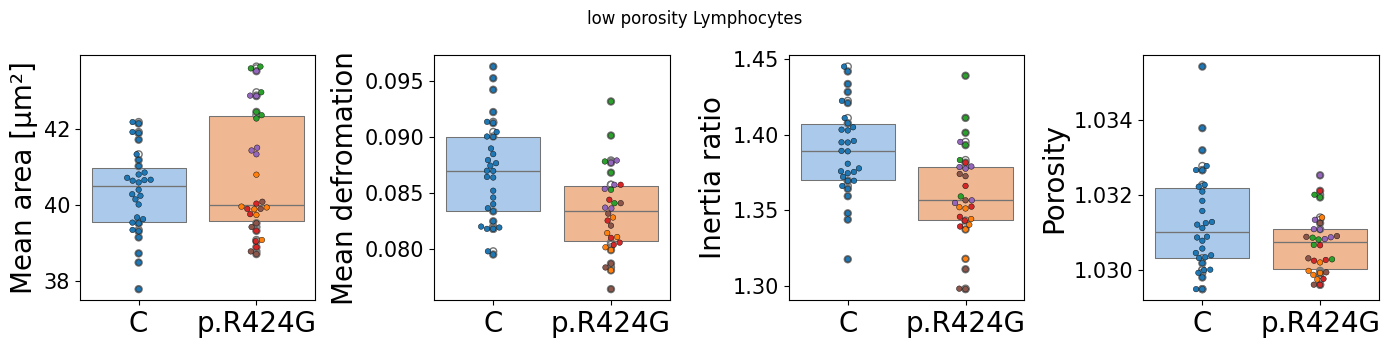

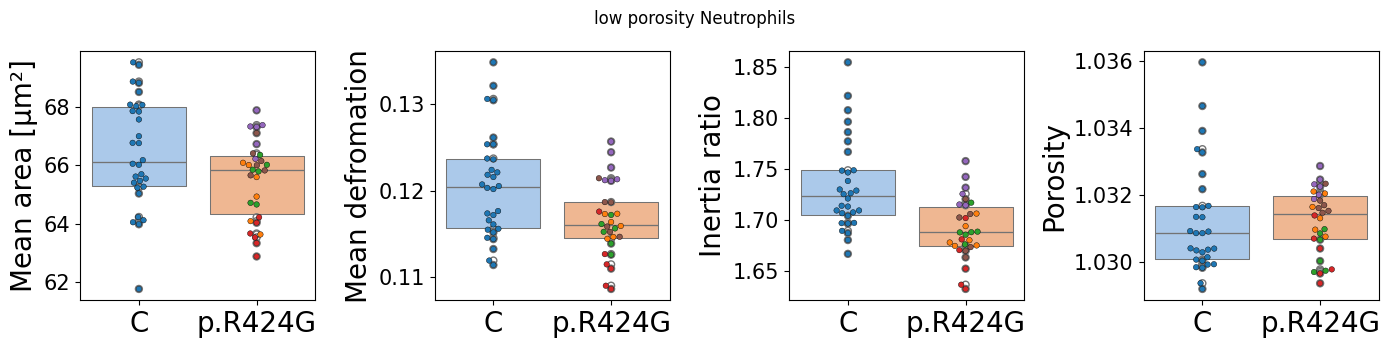

In [38]:
all_cells = ["low porosity Lymphocytes", "low porosity Neutrophils"]
for cell_type in all_cells:
    print(cell_type)
    plot_results(cell_type, df_all, "diagnosis")

In [39]:
# This is pooled d: Cohen’s d for Student t-test.
# Assuming not equal variances of groups
def Cohens_d_Student(d1, d2):
     n1, n2 = len(d1), len(d2)
     var1, var2 = np.var(d1), np.var(d2)
     s = np.sqrt(((n1 - 1) * var1 + (n2 - 1) * var2) / (n1 + n2 - 2))
     u1, u2 = np.mean(d1), np.mean(d2)
     return (u1 - u2) / s

In [40]:
# This is pooled d: Cohen’s d for Student t-test.
# Assuming not equal variances of groups
def Cohens_d_Welch(d1, d2):
     var1, var2 = np.var(d1), np.var(d2)
     u1, u2 = np.mean(d1), np.mean(d2)
     return (u1 - u2) / np.sqrt((var1 + var2)/2)

In [41]:
def MWU_effect_size(d1, d2):
    U1, p = mannwhitneyu(d1, d2, method="exact")
    n1, n2 = len(d1), len(d2)
    return 2*U1/(n1*n2)-1

In [61]:
def do_statisical_analysis(df_myh9, df_FR):
    print_also = False
    all_cells = ["Lymphocytes", "Neutrophils", "Erythrocytes"]
    features = ['Area mean', 'Deformation mean', 'Inertia ratio mean', 'Porosity mean']
    p_tresh = 0.05 / (len(features)*len(all_cells))
    print("cut-off p-val", p_tresh)
    df = pd.DataFrame(index = ['U-test', 'U-test p-val',
                               't-test with Holm–Bonferroni',
                               't-test p-val'])
    for cells in all_cells:
        df_controls_per_cell_type = df_controls[df_controls["cell type"] == cells].copy()
        df_patients_per_cell_type = df_patients[df_patients["cell type"] == cells].copy()
        for feature in features:
            for_control = df_controls_per_cell_type[feature]
            for_patient = df_patients_per_cell_type[feature]
            p_nonparametric = round(mannwhitneyu(for_control, for_patient).pvalue, 5)
            p_parametric = round(ttest_ind(for_control, for_patient).pvalue, 5)
            p_anova = round(f_oneway(for_control, for_patient).pvalue, 5)
            stat_nonparametric = round(mannwhitneyu(for_control, for_patient).statistic, 3)
            stat_parametric = round(ttest_ind(for_control, for_patient).statistic, 3)
            N_parametric = round(ttest_ind(for_control, for_patient).df, 1)
            effect_parametric = round(Cohens_d_Student(for_control, for_patient), 3)
            effect_nonparametric = round(MWU_effect_size(for_control, for_patient), 3)

            if print_also:
                print(feature + " for " + cells)
                print("U-test:", p_nonparametric < p_tresh, "U-test:", p_nonparametric, "r:", effect_nonparametric)
                print("T-test:", p_parametric < p_tresh, "T-test:", p_parametric, "Cohen´s d:", effect_parametric)
                print("ANOVA one-was:", p_anova < p_tresh, "p_anova:", p_anova)

            df.loc['U-test', feature + " for "  + cells] = p_nonparametric < p_tresh
            df.loc['U-test p-val', feature + " for " + cells] = p_nonparametric
            df.loc['t-test with Holm–Bonferroni', feature + " for " + cells] = p_parametric < p_tresh
            df.loc['t-test p-val', feature + " for " + cells] = p_parametric
            df.loc['t-test t-val', feature + " for " + cells] = stat_parametric
            df.loc['t-test N', feature + " for " + cells] = N_parametric
            df.loc['Cohen´s d', feature + " for " + cells] = effect_parametric
    return df

In [62]:
df_results = do_statisical_analysis(df_patients, df_controls)
df_results.head(n=10)

cut-off p-val 0.004166666666666667


,Area mean for Lymphocytes,Deformation mean for Lymphocytes,Inertia ratio mean for Lymphocytes,Porosity mean for Lymphocytes,Area mean for Neutrophils,Deformation mean for Neutrophils,Inertia ratio mean for Neutrophils,Porosity mean for Neutrophils,Area mean for Erythrocytes,Deformation mean for Erythrocytes,Inertia ratio mean for Erythrocytes,Porosity mean for Erythrocytes
U-test,False,True,True,False,False,False,True,False,False,False,False,False
U-test p-val,0.59969,0.00177,0.0009,0.01837,0.11199,0.46427,0.00086,0.27071,0.06787,0.20095,0.46427,0.03514
t-test with Holm–Bonferroni,False,True,True,False,False,False,True,False,False,False,False,False
t-test p-val,0.23395,0.00194,0.00061,0.08463,0.08406,0.19611,0.00037,0.56762,0.05453,0.13226,0.74084,0.02273
t-test t-val,-1.203,3.246,3.626,1.755,1.758,1.308,3.785,-0.575,1.962,1.527,-0.332,2.34
t-test N,58.0,58.0,58.0,58.0,58.0,58.0,58.0,58.0,58.0,58.0,58.0,58.0
Cohen´s d,-0.316,0.853,0.952,0.461,0.462,0.343,0.994,-0.151,0.515,0.401,-0.087,0.615


In [63]:
df_results.to_excel(r"D:\Other Backup\Myh9 project\statistics\Effect_sizes_per_measurement.xlsx")